In [3]:
#Import and load...

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? A: The average square of errors, ie the difference between observed and predicted values. Similar to OLS.The R2 score a statistical measure that represents the proportion of variance in a dependent variable that is predictable from the independent variable(s) in a regression model.  A higher R² value generally suggests a better fit for the model.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? A: Build and preprocess data for Machine Learning Models.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [5]:
df = pd.read_csv('../data/processed/cleaned_Telco_Data.csv')

In [6]:
#Confirming DataFrame loaded.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Convert Senior Citizen to Yes/No
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0:'No'})

In [8]:
# Convert Objects to Categories
columns_to_process = ['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col_name in columns_to_process:
    df[col_name] = df[col_name].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

I converted several objects into category dtypes. The category dtype explicitly signals that the data represents discrete categories rather than arbitrary strings. This can lead to more appropriate handling in statistical analyses and visualizations.

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Confirmed all Senior Citizen is Yes/No. Now I want to see if its dtype is a category.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

Other than Monthly Charges, Total Charges, and tenure, all my features are categorical variables. I'd like to bucket tenure into so it's no longer an integer, but rather a categorical variable.

In [12]:
#exploring Tenure 

df['tenure'].value_counts().sort_values()

tenure
36     50
44     51
39     56
28     57
38     59
     ... 
4     176
3     200
2     238
72    362
1     613
Name: count, Length: 72, dtype: int64

In [13]:
#Checking max, min of tenure to see if it can be evenly divided into buckets...
df['tenure'].max(), df['tenure'].min()

(72, 1)

72 months can be divided into 6 buckets of 12 months.

In [14]:
#Bucketing tenure into  6 bins of 12 months...
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [15]:
#confirming buckets

df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [16]:
#Can drop old tenure column, as well as customerID, since this will not influence the outcome of Churn.

df.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   PhoneService      7032 non-null   category
 5   MultipleLines     7032 non-null   category
 6   InternetService   7032 non-null   category
 7   OnlineSecurity    7032 non-null   category
 8   OnlineBackup      7032 non-null   category
 9   DeviceProtection  7032 non-null   category
 10  TechSupport       7032 non-null   category
 11  StreamingTV       7032 non-null   category
 12  StreamingMovies   7032 non-null   category
 13  Contract          7032 non-null   category
 14  PaperlessBilling  7032 non-null   category
 15  PaymentMethod     7032 non-null   category
 16  MonthlyCharges    7032 n

***Beginning of Analysis***

***The Analysis is broken into four sections.***
    ***I. Univariate Analysis***
    ***II. Bivariate Analysis***
    ***III. Correlation Matrix***
    ***IV. Feature Importance - Random Forest.***

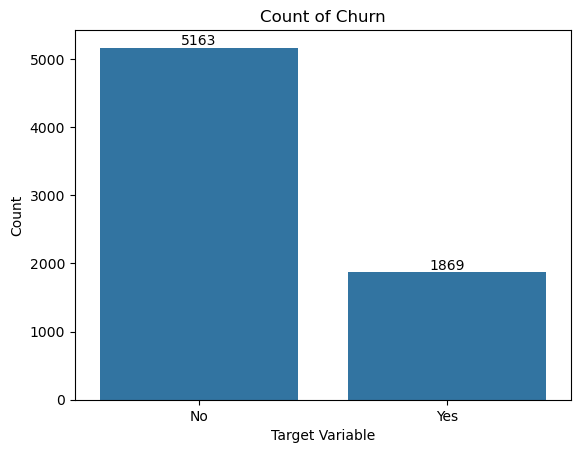

In [18]:
# I) Univariate chart of target variable (Churn)

ax = sns.countplot(x=df['Churn'])
plt.title('Count of Churn')
plt.xlabel('Target Variable')
plt.ylabel('Count')


ax.bar_label(ax.containers[0])
plt.show()

In [19]:
#Actual Numerical Breakdown of target variable
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

From the data, one can eyeball that Telco experienced about 1/4 of its customers chured last month.  I will make a pie chart to see the actual ratio.

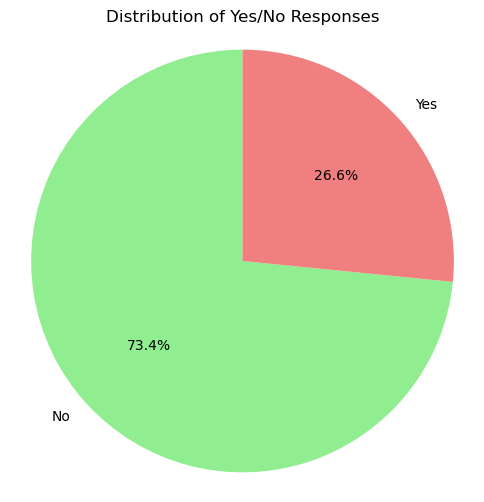

In [20]:
#Pie Chart of Target Variable "Churn"

counts = df['Churn'].value_counts()

labels = counts.index
sizes = counts.values


colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(6, 6)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Yes/No Responses')
plt.axis('equal')

plt.show()

Telco experienced a churn of 26.6 percent.  I must explore which variables cause the ratio of yes/no to significantly change?

Exploring the distribution ratio of each categorical variable against Target variable.  In other words, I want to see which variables cause the ratio of churn to change from the approx. 1/4 ratio.

Cramer’s V correlation is used to measure the association between two attributes and its value varies from 0(no relationship between the attributes) to 1 (complete association between variables).
It reaches a value of 1 only when an attribute is completely determined by the other attribute.  While Cramer's V itself is a measure of effect size (strength of association), its computation directly utilizes the chi-square test statistic.  Thus our associations should be statistically significant.

In [21]:
# Testing Statistical Significance of Correlation - CramersV (cat-cat).  

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v
    
def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(7,7))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()

*** 2. BIVARIATE ANALYSIS***

<Figure size 800x600 with 0 Axes>

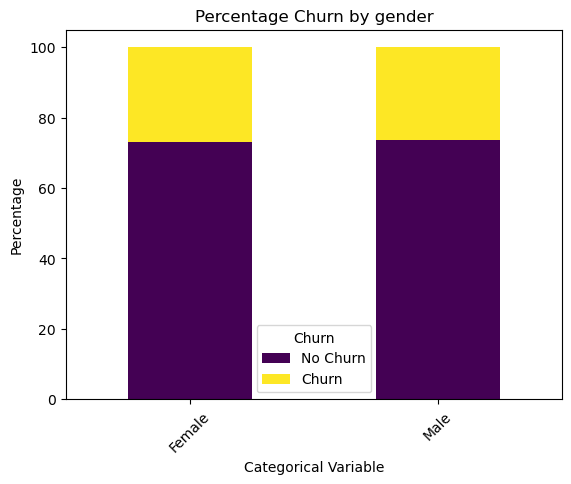

In [22]:
# Gender vs Churn

churn_percentages = df.groupby('gender')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by gender')
plt.xlabel('Categorical Variable')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [23]:
#Correlation - Gender

cramerV(df['Churn'], df['gender'])

Else condition Met:  0.0


0.0

<Figure size 800x600 with 0 Axes>

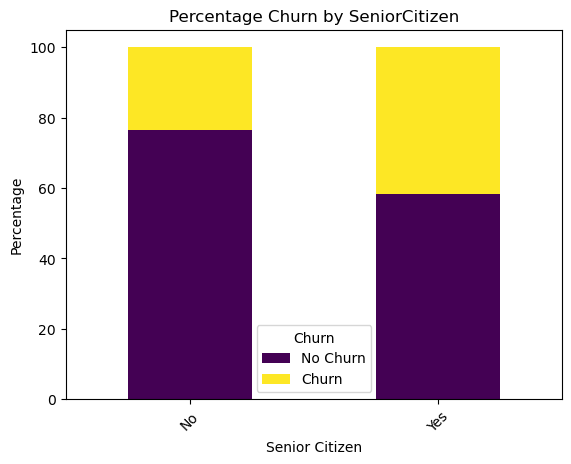

In [24]:
# Senior Citizen vs Churn
churn_percentages = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by SeniorCitizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [25]:
#Correlation - Senior Citizen

cramerV(df['Churn'], df['SeniorCitizen'])

Else condition Met:  0.14964076703557547


0.14964076703557547

<Figure size 800x600 with 0 Axes>

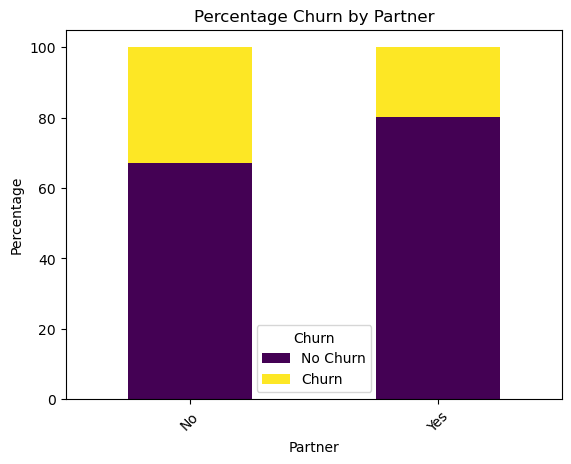

In [26]:
# Partner vs Churn

churn_percentages = df.groupby('Partner')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [27]:
#Correlation - Partner

cramerV(df['Churn'], df['Partner'])

Else condition Met:  0.14919449600978893


0.14919449600978893

<Figure size 800x600 with 0 Axes>

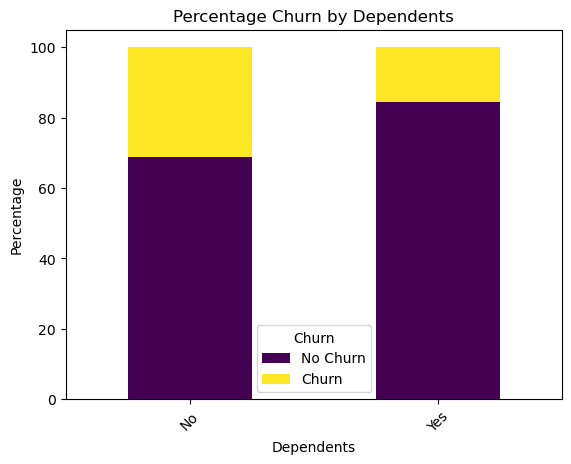

In [28]:
# Dependents vs Churn

churn_percentages = df.groupby('Dependents')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [29]:
#Correlation - Dependents

cramerV(df['Churn'], df['Dependents'])

Else condition Met:  0.16235077099642556


0.16235077099642556

<Figure size 800x600 with 0 Axes>

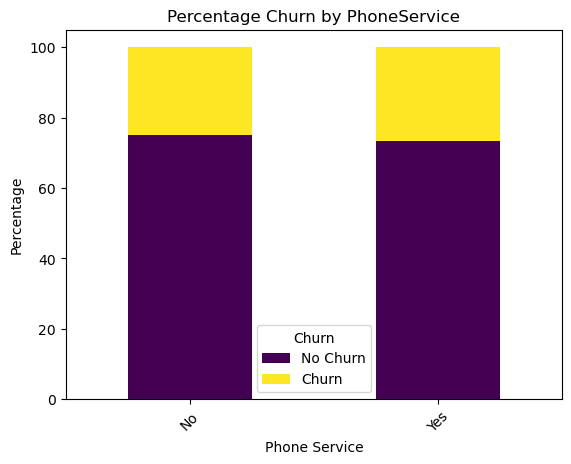

In [30]:
# Phone Service vs Churn

churn_percentages = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by PhoneService')
plt.xlabel('Phone Service')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [31]:
#Correlation - Phone Service

cramerV(df['Churn'], df['PhoneService'])

Else condition Met:  0.0


0.0

<Figure size 800x600 with 0 Axes>

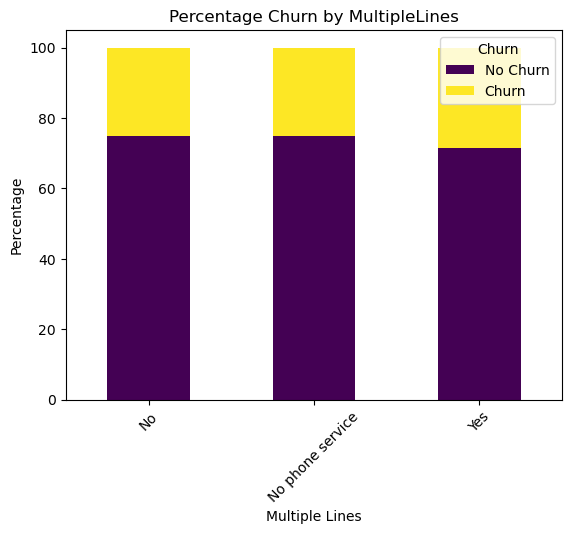

In [32]:
# Multiple Lines vs Churn

churn_percentages = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by MultipleLines')
plt.xlabel('Multiple Lines')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [33]:
#Correlation - Multiple Lines

cramerV(df['Churn'], df['MultipleLines'])

Else condition Met:  0.03631288469394084


0.03631288469394084

<Figure size 800x600 with 0 Axes>

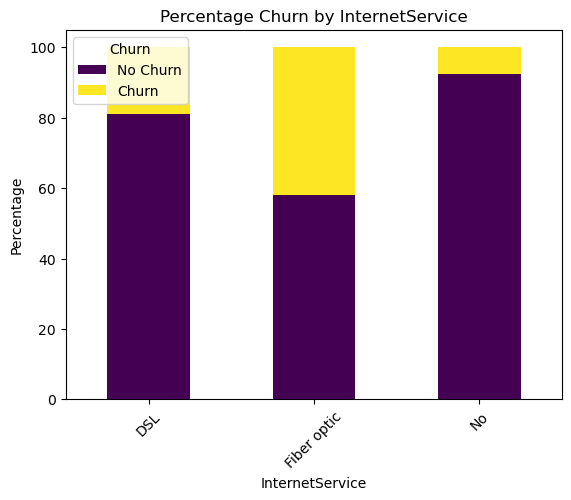

In [34]:
# Internet Service vs Churn

churn_percentages = df.groupby('InternetService')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [35]:
#Correlation - Internet Service

cramerV(df['Churn'], df['InternetService'])

Else condition Met:  0.32149012684239364


0.32149012684239364

<Figure size 800x600 with 0 Axes>

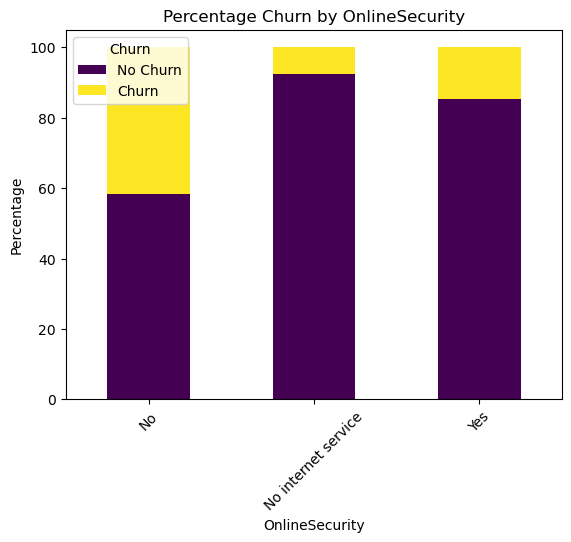

In [36]:
# Online Security vs Churn

churn_percentages = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [37]:
#Correlation - Online Security

cramerV(df['Churn'], df['OnlineSecurity'])

Else condition Met:  0.34660659081201656


0.34660659081201656

<Figure size 800x600 with 0 Axes>

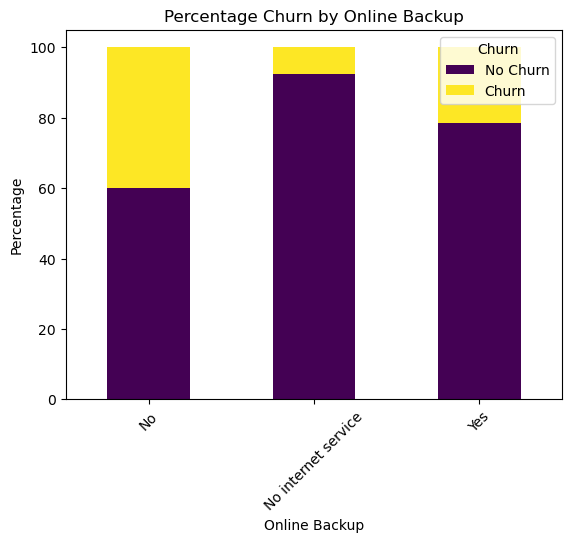

In [38]:
# Online Backup vs Churn

churn_percentages = df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by Online Backup')
plt.xlabel('Online Backup')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [39]:
#Correlation - Online Backup
cramerV(df['Churn'], df['OnlineBackup'])

Else condition Met:  0.2914353495763664


0.2914353495763664

<Figure size 800x600 with 0 Axes>

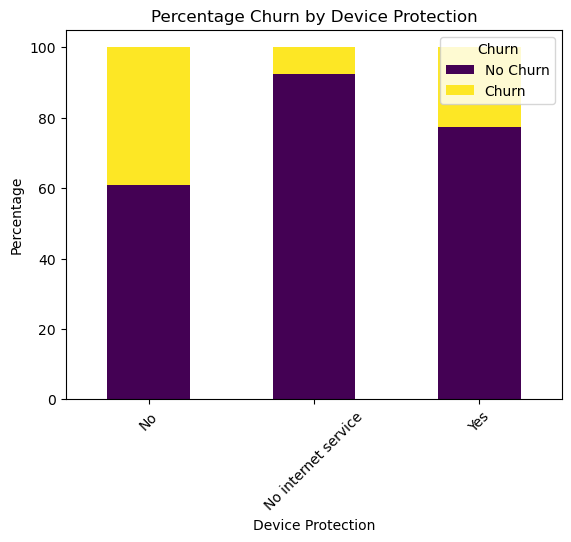

In [40]:
# Device Protection vs Churn

churn_percentages = df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by Device Protection')
plt.xlabel('Device Protection')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [41]:
#Correlation - Device Protection

cramerV(df['Churn'], df['DeviceProtection'])

Else condition Met:  0.2806721452021523


0.2806721452021523

<Figure size 800x600 with 0 Axes>

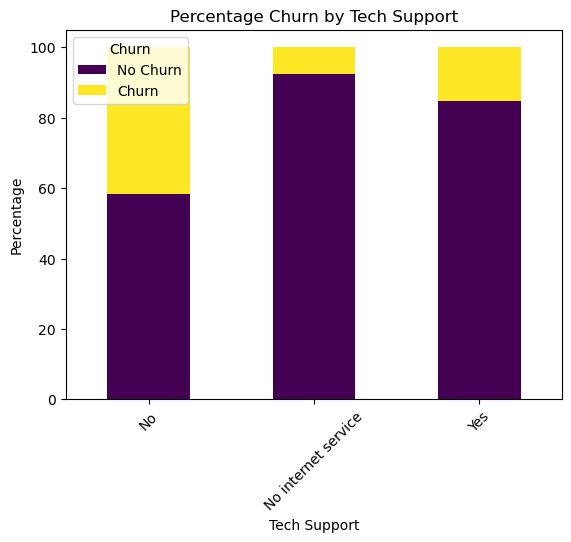

In [42]:
# Tech Support vs Churn
churn_percentages = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [43]:
#Correlation - Tech Support

cramerV(df['Churn'], df['TechSupport'])

Else condition Met:  0.3421146385510338


0.3421146385510338

<Figure size 800x600 with 0 Axes>

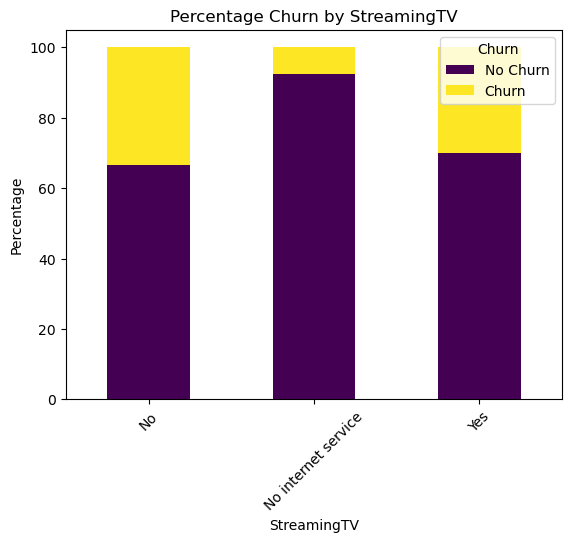

In [44]:
# Streaming Tv vs Churn
churn_percentages = df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [45]:
#Correlation - Streaming TV

cramerV(df['Churn'], df['StreamingTV'])

Else condition Met:  0.22954080451622252


0.22954080451622252

<Figure size 800x600 with 0 Axes>

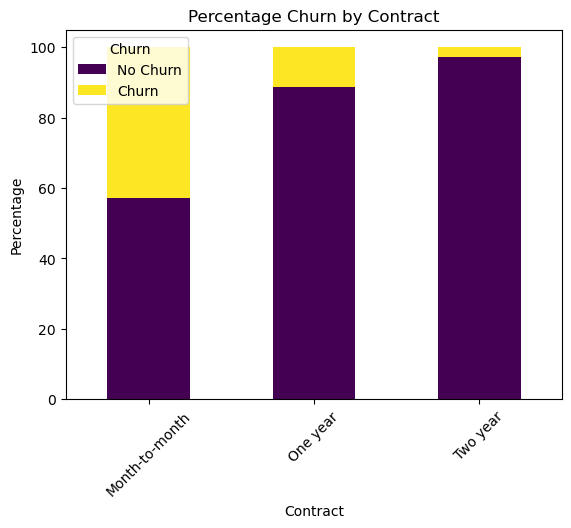

In [46]:
# Contract vs Churn

churn_percentages = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [47]:
#Correlation - Contract

cramerV(df['Churn'], df['Contract'])

Else condition Met:  0.4092421071634284


0.4092421071634284

<Figure size 800x600 with 0 Axes>

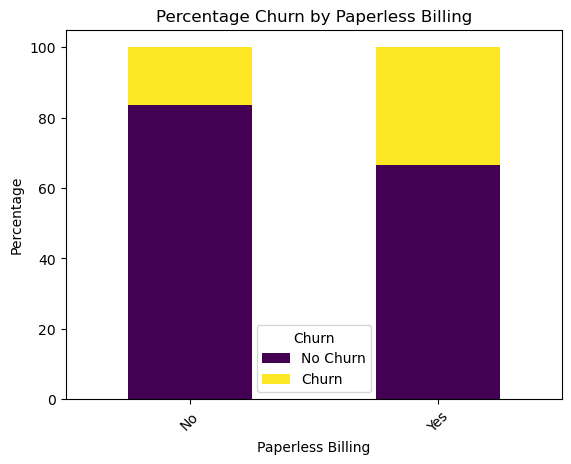

In [48]:
# Paperless Billing vs Churn

churn_percentages = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [49]:
#Correlation - Paperless Billing

cramerV(df['Churn'], df['PaperlessBilling'])

Else condition Met:  0.19076784985280437


0.19076784985280437

<Figure size 800x600 with 0 Axes>

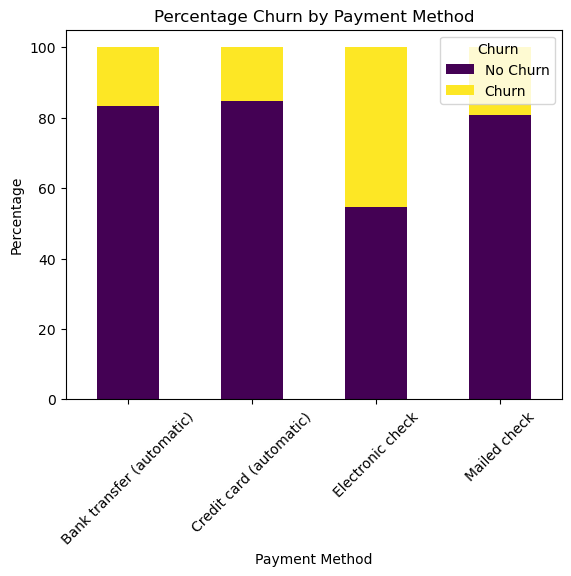

In [50]:
# Payment Method vs Churn

churn_percentages = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [51]:
#Correlation - Payment Method

cramerV(df['Churn'], df['PaymentMethod'])

Else condition Met:  0.3022763601884123


0.3022763601884123

<Figure size 800x600 with 0 Axes>

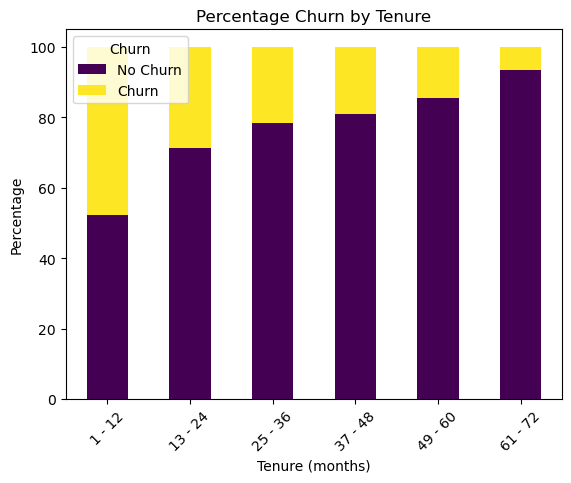

In [52]:
#Tenure vs Churn
churn_percentages = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).mul(100).unstack()

plt.figure(figsize=(8, 6))
churn_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Churn by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

In [53]:
#Correlation - Tenure Group
cramerV(df['Churn'], df['tenure_group'])

Else condition Met:  0.3531275407929485


0.3531275407929485

From the above graphs, one can see how the variables "Contract," "Online Security," "Tenure," "Tech Support," and "Internet Service" altered the ratios of "Churn" the most.  Their CramersV Coefficient confirmed their correlation statistically.

Else condition Met:  0.9997155203700907
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.07294832411424397
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.0
Else condition Met:  0.9994772076104754
Else condition Met:  0.011505783815786404
Else condition Met:  0.2098049750167311
Else condition Met:  0.0
Else condition Met:  0.14576805737362653
Else condition Met:  0.2644013560210589
Else condition Met:  0.21006665375279257
Else condition Met:  0.18177811412795422
Else condition Met:  0.18206462061566003
Else condition Met:  0.22308846520493222
Else condition Met:  0.18466166358304406
Else condit

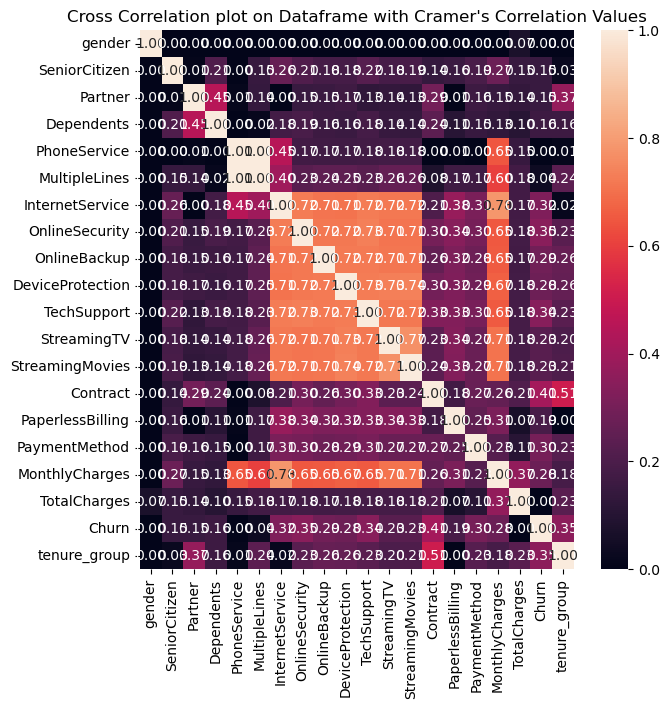

In [54]:
# Cramers V - Heatmap.  Visualize the correlation between the target and individual features. (Scroll Down)

plot_cramer(df)

From the heatmap, one can see the greater correlations between 'Churn' and 'Contract', 'Online Security', 'Tenure', 'Tech Support', and 'Internet Service.'  This is consistent with my charts above.

***Since Monthly Charges and Total Charges are continuous variables, I plotted their distrubtion with a histogram and observed their respective realtionship with Churn.***

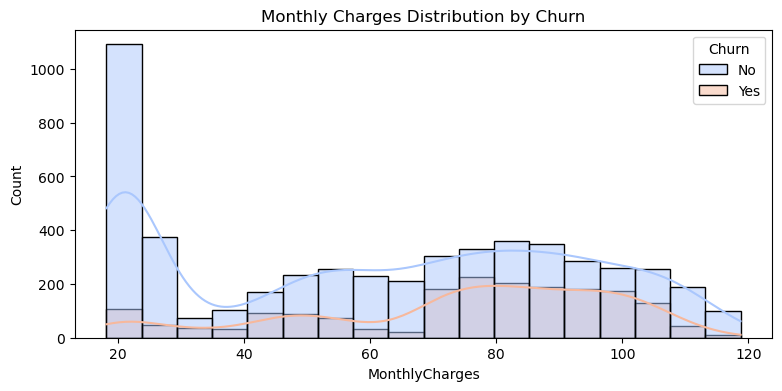

In [55]:
# Monthy Charges vs Churn

plt.figure(figsize=(9,4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, palette='coolwarm')
plt.title("Monthly Charges Distribution by Churn")
plt.show()

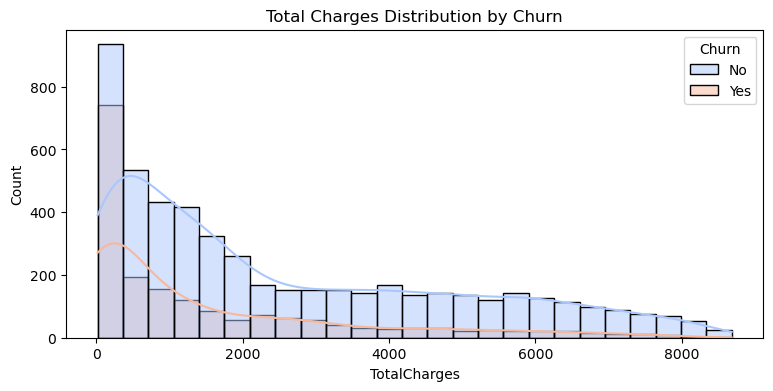

In [56]:
# Total Charges Vs Churn

plt.figure(figsize=(9,4))
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, palette='coolwarm')
plt.title("Total Charges Distribution by Churn")
plt.show()

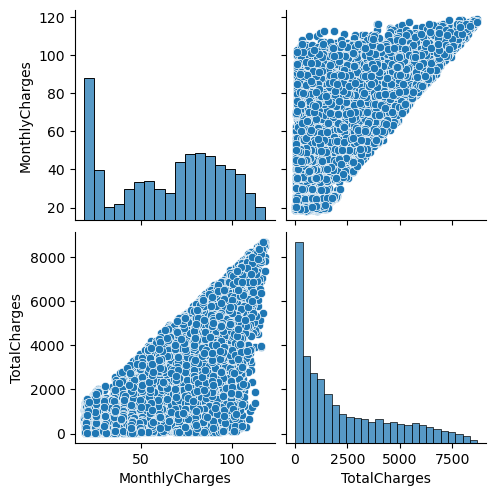

In [57]:
#Pair Plot for Continuous Variables...is there any correlation between Monthly Charges and total charges.
sns.pairplot(df)

In [58]:
#Exploring any correlation coefficents between these variables...

numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
print(correlation)

                MonthlyCharges  TotalCharges
MonthlyCharges        1.000000      0.651065
TotalCharges          0.651065      1.000000


Monthly Charges and Total Charges are correlated. I'd like to explore how these variables correlated to Churn.  I will convert Churn to a binary for two reasons.  1.) In order to compare churn as a numerical variable to my other numerical variables. 2.) In order for Churn not to be one-hot encoded prior to Random Forest.

In [59]:
# Convert Churn (Yes/No) to Binary for EDA

#df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['Churn'] = np.where(df.Churn== 'Yes', 1, 0)

In [60]:
#Check that conversion took place
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [61]:
# Point by Serial Correlation between Churn and Monthly Charges

import scipy.stats as stats
import numpy as np


binary_variable = df['Churn']

# Define a continuous variable
continuous_variable = df['MonthlyCharges']

# Calculate the point-biserial correlation
correlation_result = stats.pointbiserialr(binary_variable, continuous_variable)

# Print the results
print(f"Point-Biserial Correlation Coefficient: {correlation_result.correlation:.4f}")
print(f"P-value: {correlation_result.pvalue:.4f}")

Point-Biserial Correlation Coefficient: 0.1929
P-value: 0.0000


In [62]:
# Point by Serial Correlation between Churn and Total Charges


binary_variable = df['Churn']

# Define a continuous variable
continuous_variable = df['TotalCharges']

# Calculate the point-biserial correlation
correlation_result = stats.pointbiserialr(binary_variable, continuous_variable)

# Print the results
print(f"Point-Biserial Correlation Coefficient: {correlation_result.correlation:.4f}")
print(f"P-value: {correlation_result.pvalue:.4f}")

Point-Biserial Correlation Coefficient: -0.1995
P-value: 0.0000


In [63]:
#Exploring any correlation coefficents between these variables...

numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
print(correlation)

                MonthlyCharges  TotalCharges     Churn
MonthlyCharges        1.000000      0.651065  0.192858
TotalCharges          0.651065      1.000000 -0.199484
Churn                 0.192858     -0.199484  1.000000


***There is a positive correlation between Churn and Monthly Charges.  A Negative Correlation between Churn and Total Charges.***

In [64]:
# One-Hot Encode to Prep Data for Random Forest 

telco_dummies = pd.get_dummies(df)

#Observe "new" Columns.

telco_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,True,False,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,56.95,1889.50,0,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,53.85,108.15,1,False,True,True,False,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,42.30,1840.75,0,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,70.70,151.65,1,True,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [65]:
#Calculate the correlation of variables
telco_dummies.corr()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
MonthlyCharges,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.219874,0.219874,-0.097825,0.097825,0.112343,...,0.042410,0.030055,0.271117,-0.376568,-0.191881,-0.047220,0.009465,0.017614,0.070048,0.185440
TotalCharges,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.102411,0.102411,-0.319072,0.319072,-0.064653,...,0.186119,0.182663,-0.060436,-0.294708,-0.592443,-0.210745,-0.047370,0.083696,0.252905,0.639312
Churn,0.192858,-0.199484,1.000000,0.008545,-0.008545,-0.150541,0.150541,0.149982,-0.149982,0.163128,...,-0.118136,-0.134687,0.301455,-0.090773,0.319628,0.019929,-0.040997,-0.059579,-0.100800,-0.226078
gender_Female,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,...,0.015973,-0.001632,-0.000844,-0.013199,0.001050,0.000649,-0.006249,0.020658,0.004319,-0.016279
gender_Male,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,...,-0.015973,0.001632,0.000844,0.013199,-0.001050,-0.000649,0.006249,-0.020658,-0.004319,0.016279
SeniorCitizen_No,-0.219874,-0.102411,-0.150541,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,-0.210550,...,0.016235,0.024359,-0.171322,0.152987,0.027713,-0.001860,-0.027317,0.000929,-0.014186,0.002407
SeniorCitizen_Yes,0.219874,0.102411,0.150541,0.001819,-0.001819,-1.000000,1.000000,-0.016957,0.016957,0.210550,...,-0.016235,-0.024359,0.171322,-0.152987,-0.027713,0.001860,0.027317,-0.000929,0.014186,-0.002407
Partner_No,-0.097825,-0.319072,0.149982,-0.001379,0.001379,0.016957,-0.016957,1.000000,-1.000000,0.452269,...,-0.111406,-0.082327,0.083207,0.096948,0.305061,0.048481,-0.003131,-0.035092,-0.105341,-0.280353
Partner_Yes,0.097825,0.319072,-0.149982,0.001379,-0.001379,-0.016957,0.016957,-1.000000,1.000000,-0.452269,...,0.111406,0.082327,-0.083207,-0.096948,-0.305061,-0.048481,0.003131,0.035092,0.105341,0.280353
Dependents_No,0.112343,-0.064653,0.163128,0.010349,-0.010349,-0.210550,0.210550,0.452269,-0.452269,1.000000,...,-0.052369,-0.061134,0.149274,-0.056448,0.145379,0.001459,-0.009289,-0.023544,-0.031419,-0.118090


This matrix of coefficients is consistent with the coefficients I observed for each feature and churn when I performed a CramersV.

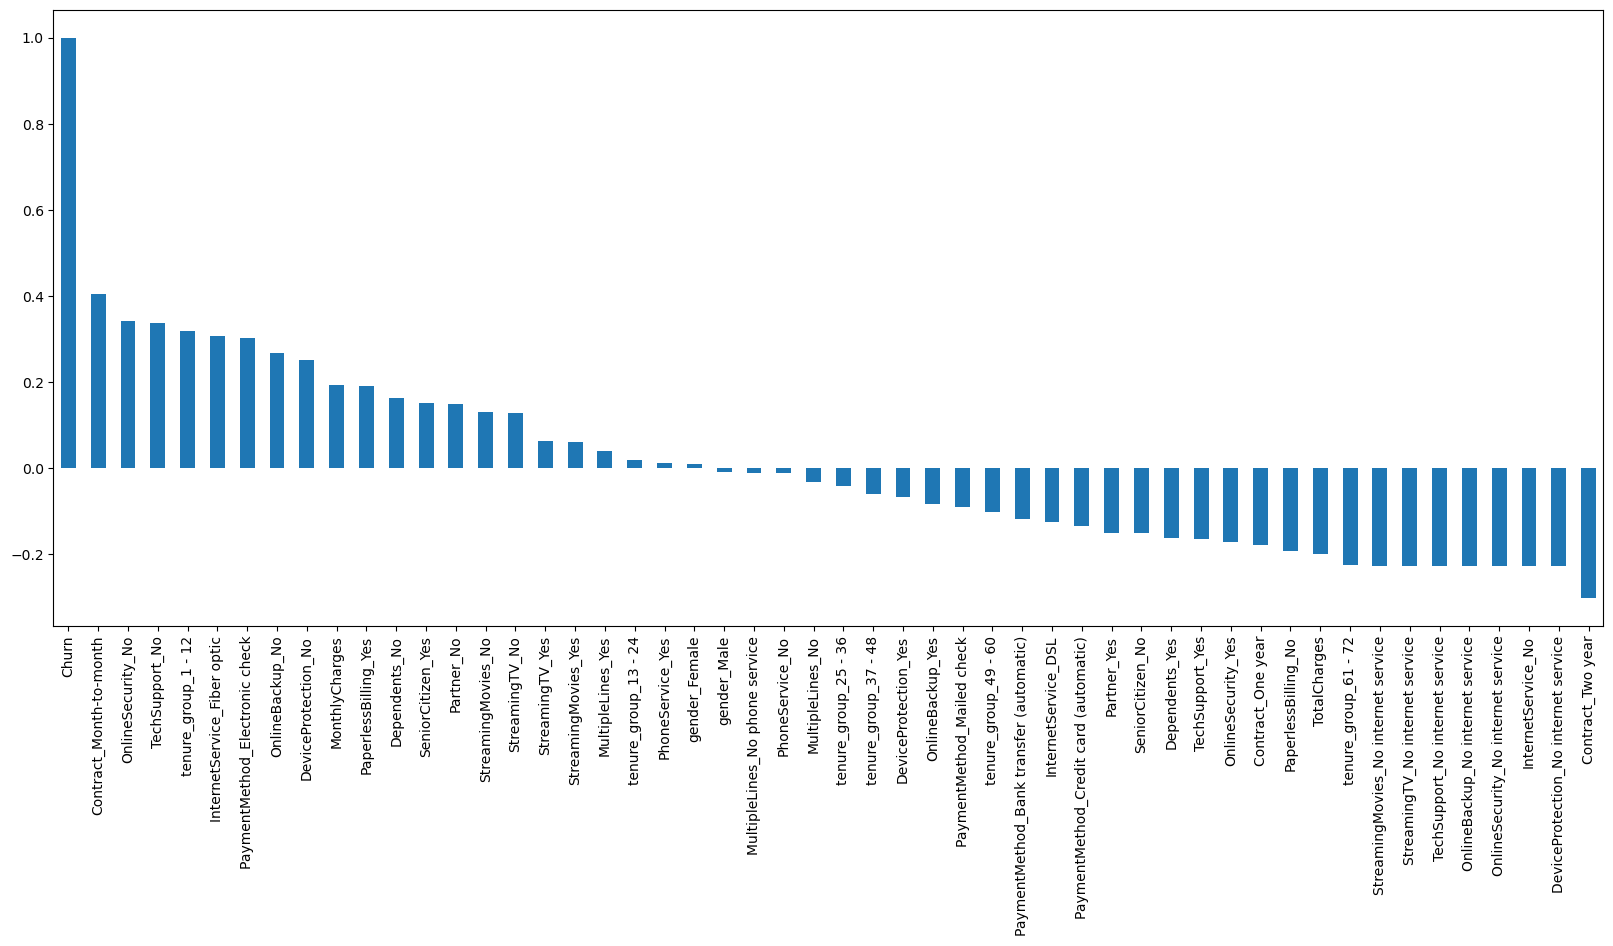

In [66]:
#Visualize Correlation between Each Feature and Target Variable after One-Hot Encode

fig, ax = plt.subplots(figsize=(20, 8))

# Plot the correlation data directly onto the specified axes
telco_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', ax=ax)

# Display the plot
plt.show()


From this plot we can see which features are most strongly correlated with churn. In order of positive correlation:

"Contract_Month_to_month", 
"OnlineSecurity_No", 
"TechSupport_No", 
"Tenure_group_1-12", 
"InternetService_Fiber Optic"
,"PaymentMethod_Electronic check", 
"OnlineBackup_no", 
"DeviceProtection_no", 
"MonthlyCharges", 
"Paperlessbilling_yes", 
"Dependents_no", 
"SeniorCitizens_yes", 
"Partner_no", 
"StreamingMovies_no", 
"StreamingTV_no", 
"StreamingTV_yes", 
"StreamingMovies_yes", 
"MultipleLines_yes", 
"tenure_group_13-24", 
"PhoneService_yes",  
"gender_Female".

This is also consistent with the CramersV above!

<Axes: >

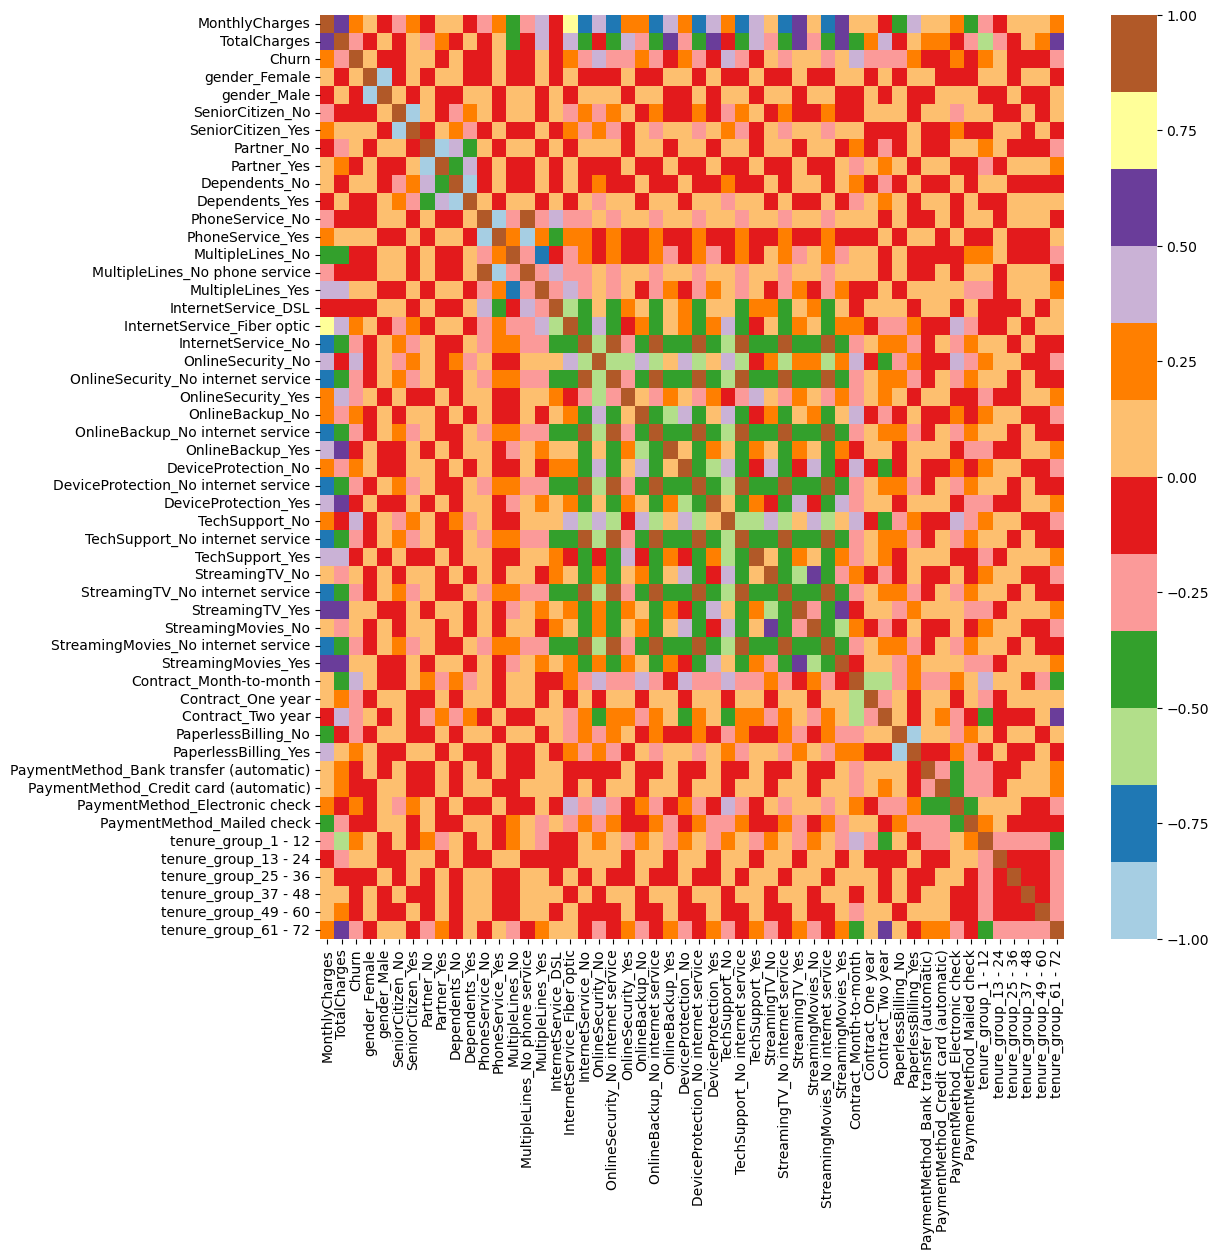

In [67]:
# Heatmap to visualize correlation matrix of Telco Customer Churn.  Darker colors represent a stronger corelation

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(telco_dummies.corr(), cmap="Paired")



In [68]:
# Feature Importance via Random Forest.  I will use the one-hot encoded dataframe.

# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})


#Load the dataset for splitting and training:


X = telco_dummies.drop('Churn', axis=1)  # Remove the Churn column to get features
y = telco_dummies['Churn']  # Target variable

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

#Fit the Random Forest Regressor with 100 Decision Trees:

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

#To get the feature importances from the Random Forest model use the feature_importances_ attribute:

rf.feature_importances_

array([2.00667122e-01, 2.63882601e-01, 1.26545187e-02, 1.22801682e-02,
       1.07301988e-02, 1.09420855e-02, 1.12469038e-02, 1.08179167e-02,
       9.98151958e-03, 1.00204817e-02, 1.55780784e-03, 1.61449740e-03,
       9.83099425e-03, 1.56504493e-03, 8.32784164e-03, 8.45542118e-04,
       4.56928437e-02, 1.94800423e-04, 1.57250205e-02, 5.59644001e-05,
       7.93260114e-03, 1.04911270e-02, 1.87632994e-04, 8.22009846e-03,
       6.99068210e-03, 3.58889158e-04, 8.42307594e-03, 1.81641780e-02,
       3.32882079e-04, 7.60045691e-03, 6.07050744e-03, 2.58211189e-05,
       6.14418908e-03, 5.83454063e-03, 2.14681411e-04, 5.89051696e-03,
       1.64361492e-01, 2.12617468e-03, 2.19233154e-03, 1.20471806e-02,
       1.22881772e-02, 1.11076077e-02, 1.01236251e-02, 1.91365343e-02,
       1.14252017e-02, 4.15686367e-03, 3.95323000e-03, 4.79921894e-03,
       5.66945060e-03, 3.94485882e-03, 1.15229870e-03])

Text(0.5, 1.0, 'Feature Importance')

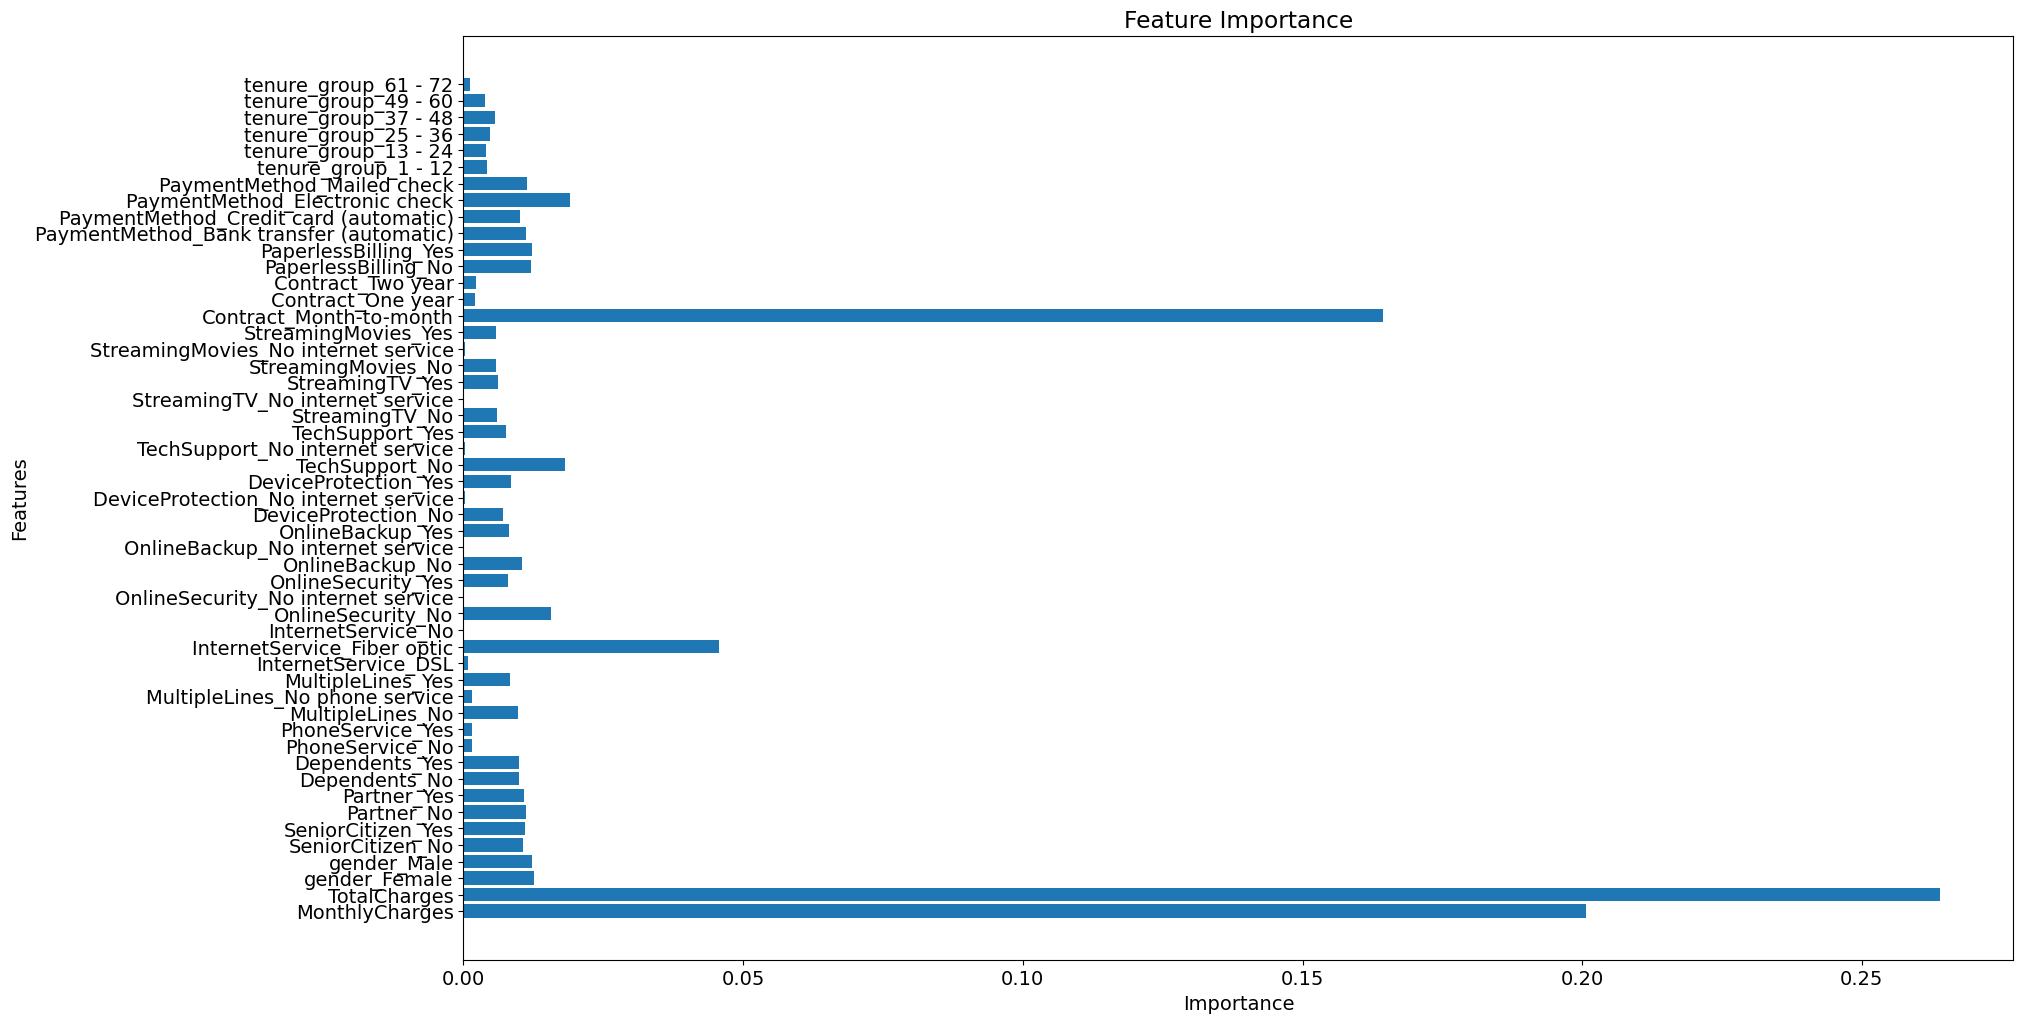

In [69]:
#plot the importances to better interpret the values

# Get feature names from X (assuming X is a DataFrame)
feature_names = X.columns if hasattr(X, 'columns') else [f'feature {i}' for i in range(len(rf.feature_importances_))]

# Create positions for the bars (0, 1, 2, ...)
positions = np.arange(len(rf.feature_importances_))

# Plot horizontal bar chart with feature names
plt.figure(figsize=(20, 12))  # Optional: adjust figure size
plt.barh(positions, rf.feature_importances_)
plt.yticks(positions, feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

Text(0.5, 0, 'Random Forest Feature Importance')

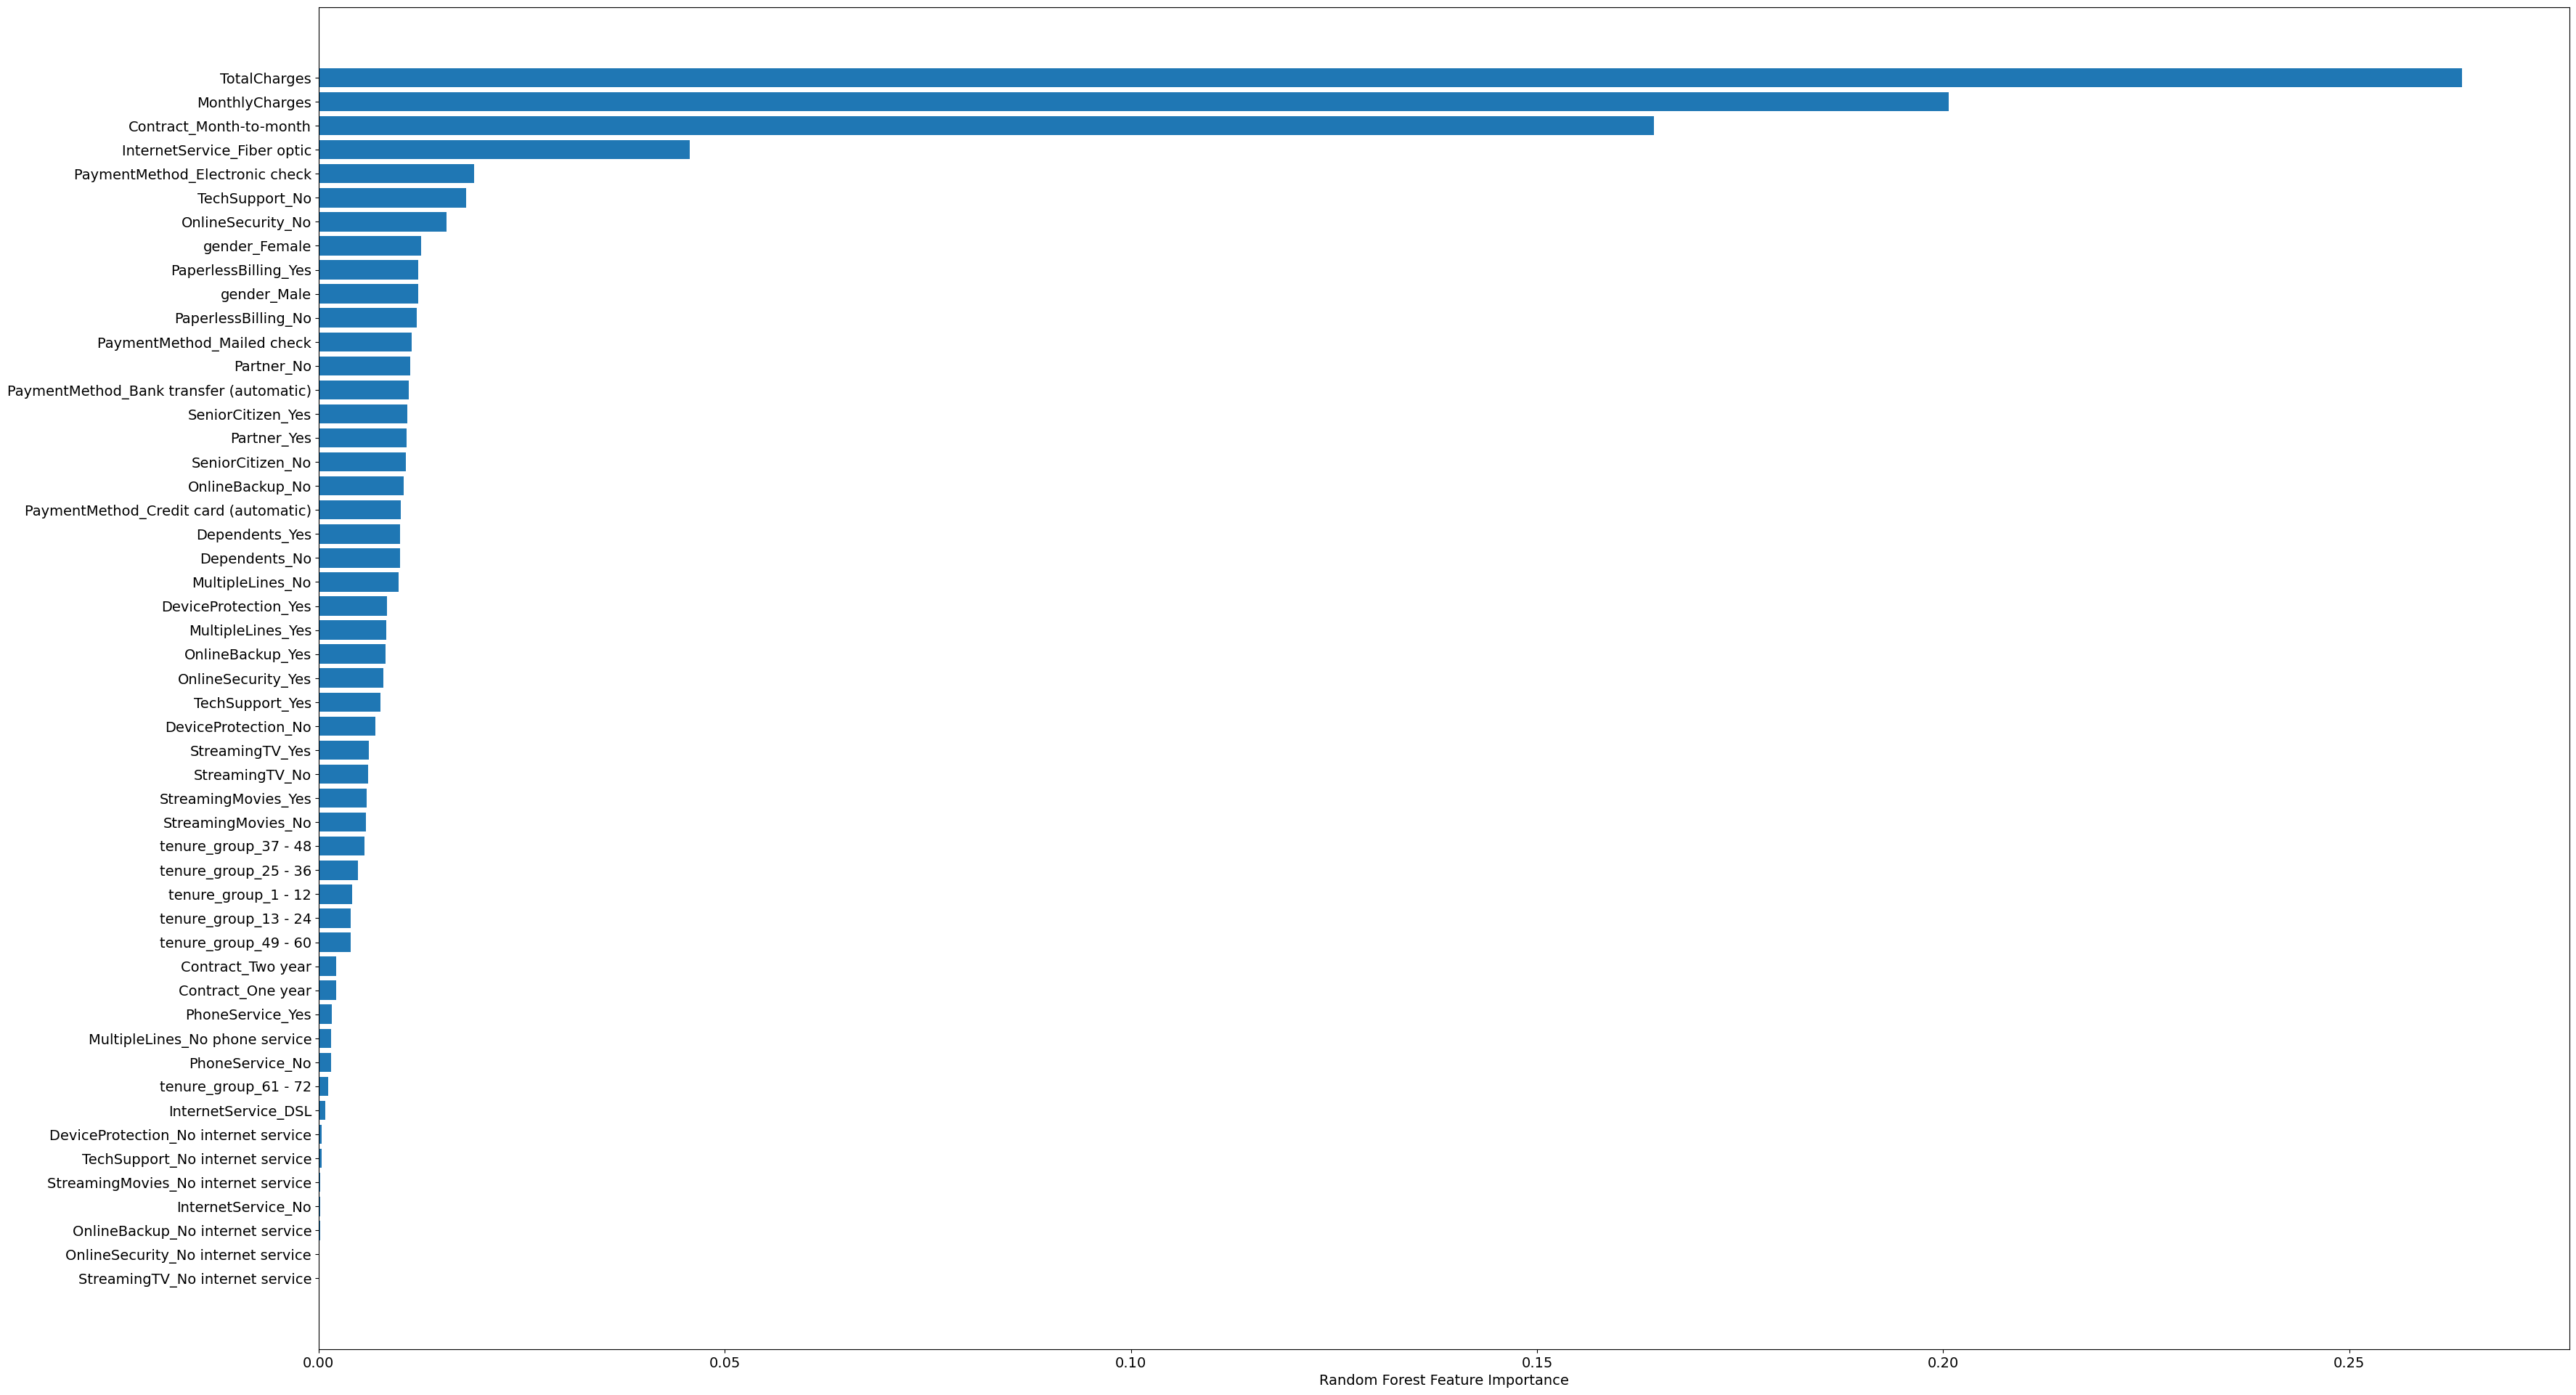

In [70]:
#sorted

sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(40, 24))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

From the plot, one can see Total Charges, Monthly Charges, Contract_month_to_month, Internet_service_fiber optic, TechSupport_No, and PaymentMethod_Electronic check as important features.  They should be considered when modeling.

Conclusion:
The purpose of this exploration is to understand what features contribute to "Churn," ie customers who choose not to continue their contract with Telco. The null hypothesis is none of the features contribute to customer churn. I wish to find statistically significant correlations between the features in order to reject the null hypothesis. My strategy was to start very broad; first with a univeriate analysis of the feature "Churn."  I noticed that Telco experienced a churn of 26.6 percent. I then explored which variables cause the ratio of yes/no to significantly change.  I achieved this through the creation of several bi-variate plots to understand how "Churn" related to (first) the other categorical features of the dataset and then to the continuous variables of the dataset. I found the correlation coefficient for Churn and categorical variables with the CramersV function.  From the above graphs generated, one could see how the variables "Contract," "Online Security," "Tenure," "Tech Support," and "Internet Service" altered the ratios of "Churn" more when compared to other variables.  Some variables like 'Gender' had no correlation. Their CramersV Coefficient confirmed their correlation statistically.  The correlation heatmap confirmed correlation visually.

I found the Pearson correlation coefficient for Churn and the continuous variables, "Monthly Charges" and "Total Charges". From the graphs and statitistics, one can see Monthly Charges and Total Charges are correlated.  Also, there is a positive correlation between Churn and Monthly Charges. A Negative Correlation between Churn and Total Charges.

I performed One-Hot Encoding of my mostly categorical data set to prep it for Random Forest, which will help glean important features for modeling.  The correlations gathered from the one hot encode were consistant with what I say through my CramersV correlation.  Namely, "Contract_Month_to_month", "OnlineSecurity_No", "TechSupport_No", "Tenure_group_1-12", "InternetService_Fiber Optic","PaymentMethod_Electronic check", "OnlineBackup_no", "DeviceProtection_no", "MonthlyCharges", "Paperlessbilling_yes", "Dependents_no", "SeniorCitizens_yes", "Partner_no", "StreamingMovies_no", "StreamingTV_no", "StreamingTV_yes", "StreamingMovies_yes", "MultipleLines_yes", "tenure_group_13-24", "PhoneService_yes", and "gender_Female" all had positive correlations to "Churn."
 
Lastly, I used a Random Forest to glean important features for modeling.  From the Random Forest, one sees "Total Charges", "Monthly Charges", "Contract_month_to_month", "Internet_service_fiber optic", "TechSupport_No", and "PaymentMethod_Electronic check" as important features to be exploded when modeling.